# Домашнее задание к лекции «Поиск выбросов и генерация новых признаков»

### Задание к домашней работе

- Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет www.kaggle.com...iques/data (train.csv)
- Данных немного, поэтому необходимо использовать 10-fold кросс-валидацию для оценки качества моделей
- Построить случайный лес, вывести важность признаков
- Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную
- Для валидации модели 2-го уровня использовать отдельный hold-out датасет, как на занятии
- Показать, что использование ансамблей моделей действительно улучшает качество (стекинг vs другие модели сравнивать на hold-out)
- В качестве решения: Jupyter notebook с кодом, комментариями и графиками

Импортируем основные библиотеки для начала работы по обработке данных, разделению данных, импорт модели и визуализация. И прочитаем данные в файле csv при помощи pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Обработка данных

Судя по данным здесь представлены разные типы переменных: числа, объекты, это и количественные и категориальные признаки. Видно, что есть признаки с большим количеством пропущенных значений.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Проверим на уникальность признаки: есть ли такие признаки, где значение у всех строк одно и то же.

In [5]:
# посмотрим есть ли среди всех строк какое-то одно значение переменной, от которого можно уйти 
for i in data.columns:
    print('\t')
    print(i,' - ', data[i].unique())

	
Id  -  [   1    2    3 ... 1458 1459 1460]
	
MSSubClass  -  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
	
MSZoning  -  ['RL' 'RM' 'C (all)' 'FV' 'RH']
	
LotFrontage  -  [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
	
LotArea  -  [ 8450  9600 11250 ... 17217 13175  9717]
	
Street  -  ['Pave' 'Grvl']
	
Alley  -  [nan 'Grvl' 'Pave']
	
LotShape  -  ['Reg' 'IR1' 'IR2' 'IR3']
	
LandContour  -  ['Lvl' 'Bnk' 'Low' 'HLS']
	
Utilities  -  ['AllPub' 'NoSeWa']
	
LotConf

Для удобства работы объявим новую переменную с данными, где будем проводить обработку, препроцессинг. Так следующим шагом уберём признаки, где заполняемость данными меньше 80% при помощи метода .drop(). Заодно выведим удалённые признаки.

In [6]:
data_refresh = data

In [7]:
# Уберём столбцы с признаками с заполняемостью < 80% 

for i in data_refresh.columns:
    if (len(data_refresh) - data_refresh[i].isna().sum()) < (0.8 * len(data_refresh)):
        data_refresh = data_refresh.drop(i, 1)
        print(' - ', i)
    else:
        pass

 -  Alley
 -  FireplaceQu
 -  PoolQC
 -  Fence
 -  MiscFeature


Уйдём от id столбца при помощи .iloc[ , ] просто не добавляя его в переменную

In [8]:
data_refresh = data_refresh.iloc[:,1:79]
data_refresh

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Уберём все строки с нулевыми значениями при помощи метода .dropna()

In [9]:
data_refresh = data_refresh.dropna()
data_refresh

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [10]:
data_refresh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   object 
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   int64  
 4   Street         1094 non-null   object 
 5   LotShape       1094 non-null   object 
 6   LandContour    1094 non-null   object 
 7   Utilities      1094 non-null   object 
 8   LotConfig      1094 non-null   object 
 9   LandSlope      1094 non-null   object 
 10  Neighborhood   1094 non-null   object 
 11  Condition1     1094 non-null   object 
 12  Condition2     1094 non-null   object 
 13  BldgType       1094 non-null   object 
 14  HouseStyle     1094 non-null   object 
 15  OverallQual    1094 non-null   int64  
 16  OverallCond    1094 non-null   int64  
 17  YearBuilt      1094 non-null   int64  
 18  YearRemo

### Поработаем с категориальными признаками

Разделим данные на категориальные и количественные признаки и применим метод .get_dummies(), чтобы модель смогла обработать данные. Делить будем по типу значений внутри признака (str - строковой тип)

In [11]:
data_refresh_obj = data_refresh
data_refresh_num = data_refresh

In [12]:
for cat in data_refresh:
    if type(data_refresh[cat].iat[0]) == type('str'):
        data_refresh_num = data_refresh_num.drop([cat], 1) 
    else:
        data_refresh_obj = data_refresh_obj.drop([cat], 1)

Проверим данные по количественным и категориальным признакам.

In [13]:
data_refresh_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1094 non-null   object
 1   Street         1094 non-null   object
 2   LotShape       1094 non-null   object
 3   LandContour    1094 non-null   object
 4   Utilities      1094 non-null   object
 5   LotConfig      1094 non-null   object
 6   LandSlope      1094 non-null   object
 7   Neighborhood   1094 non-null   object
 8   Condition1     1094 non-null   object
 9   Condition2     1094 non-null   object
 10  BldgType       1094 non-null   object
 11  HouseStyle     1094 non-null   object
 12  RoofStyle      1094 non-null   object
 13  RoofMatl       1094 non-null   object
 14  Exterior1st    1094 non-null   object
 15  Exterior2nd    1094 non-null   object
 16  MasVnrType     1094 non-null   object
 17  ExterQual      1094 non-null   object
 18  ExterCond      1094 non-null

In [14]:
data_refresh_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   LotFrontage    1094 non-null   float64
 2   LotArea        1094 non-null   int64  
 3   OverallQual    1094 non-null   int64  
 4   OverallCond    1094 non-null   int64  
 5   YearBuilt      1094 non-null   int64  
 6   YearRemodAdd   1094 non-null   int64  
 7   MasVnrArea     1094 non-null   float64
 8   BsmtFinSF1     1094 non-null   int64  
 9   BsmtFinSF2     1094 non-null   int64  
 10  BsmtUnfSF      1094 non-null   int64  
 11  TotalBsmtSF    1094 non-null   int64  
 12  1stFlrSF       1094 non-null   int64  
 13  2ndFlrSF       1094 non-null   int64  
 14  LowQualFinSF   1094 non-null   int64  
 15  GrLivArea      1094 non-null   int64  
 16  BsmtFullBath   1094 non-null   int64  
 17  BsmtHalfBath   1094 non-null   int64  
 18  FullBath

In [15]:
data_refresh_obj_dummies = pd.get_dummies(data_refresh_obj, prefix = data_refresh_obj.columns)
data_refresh_obj_dummies

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
data_refresh_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [17]:
y = data_refresh_num.iloc[:, 36]
data_refresh_num = data_refresh_num.iloc[:, :35]
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1094, dtype: int64

In [18]:
X_num = data_refresh_num
X_obj = data_refresh_obj_dummies

Соединим после обработки данные опять в один датафрейм.

In [19]:
#  X_num.merge(X_obj, left_index = True, right_index = True) -второй способ
X = pd.concat([X_obj, X_num], axis=1)
X

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,0,0,0,1,0,0,1,0,0,0,...,2,548,0,61,0,0,0,0,0,2
1,0,0,0,1,0,0,1,0,0,0,...,2,460,298,0,0,0,0,0,0,5
2,0,0,0,1,0,0,1,1,0,0,...,2,608,0,42,0,0,0,0,0,9
3,0,0,0,1,0,0,1,1,0,0,...,3,642,0,35,272,0,0,0,0,2
4,0,0,0,1,0,0,1,1,0,0,...,3,836,192,84,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,2,460,0,40,0,0,0,0,0,8
1456,0,0,0,1,0,0,1,0,0,0,...,2,500,349,0,0,0,0,0,0,2
1457,0,0,0,1,0,0,1,0,0,0,...,1,252,0,60,0,0,0,0,2500,5
1458,0,0,0,1,0,0,1,0,0,0,...,1,240,366,0,112,0,0,0,0,4


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Используем модель Случайный лес.

In [21]:
model = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=0.5, min_samples_leaf=20,
                      n_estimators=10, n_jobs=-1)

In [22]:
model.predict(X_test)

array([143189.91891325, 120073.91767527, 152874.22528624, 127602.62276502,
       136729.99277992, 210565.69100941, 117397.98925422, 362420.72824038,
       184930.69372124, 239896.2328814 , 214609.28907558, 169284.81611295,
       232145.27103333, 176862.85841147, 229346.3553353 , 162392.63710958,
       116339.33605475, 212750.06719153, 275440.21723011, 182086.91476283,
       225862.25760561, 216533.24691328, 225091.63532064, 152779.89651652,
       274012.23843107, 155427.90652019, 279000.8597125 , 136604.17198104,
       139705.73928625, 158473.84989523, 182474.7742762 , 156278.85725535,
       271833.43518402, 167256.67458194, 251251.81744538, 259851.30473171,
       174697.72840879, 259230.26323307, 372558.3519002 , 119420.53615128,
       247348.90965224, 235083.41339316, 366796.49731758, 253416.1640043 ,
       179319.36371741, 137555.1994311 , 124738.71884791, 151213.30785036,
       146831.72795407, 161669.62459979, 170291.54741259, 147236.10094285,
       179433.79542633, 1

Оценка на тестовой и обучающей выборке выглядят достаточно успешно.

In [23]:
model.score(X_test, y_test)

0.7781678041578154

In [24]:
model.score(X_train, y_train)

0.8180226573088341

### Используем 10-fold cross-validation для проверки качества нашей модели

In [25]:
cross_val_score(model, X, y, cv=10)

array([0.81719011, 0.85578649, 0.8812684 , 0.82088667, 0.76159554,
       0.76320644, 0.83301102, 0.82514884, 0.69887106, 0.79341272])

Оценим важность признаков в моделе и изобразим столбчатую диаграмму, выделив с важностью более 0,05.

In [26]:
feature_imp = pd.DataFrame(model.feature_importances_, index = X.columns)
feature_imp

,0
MSZoning_C (all),0.000000
MSZoning_FV,0.000000
MSZoning_RH,0.000000
MSZoning_RL,0.001513
MSZoning_RM,0.000000
...,...
3SsnPorch,0.000000
ScreenPorch,0.000000
PoolArea,0.000000
MiscVal,0.000000


### Оценка важности признаков

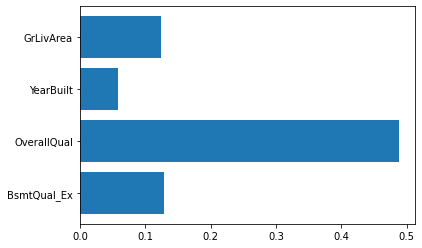

In [27]:
listing = []
listing_name = []
for feat in feature_imp.index:
    if feature_imp.loc[feat,0] > 0.05:
        listing.append(feature_imp.loc[feat,0])
        listing_name.append(feat)
plt.barh(listing_name, listing)
plt.show()

## Обучаем стекинг 3-х моделей

Импортируем различные модели для стекинга

In [28]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

### Первый вариант стекинга

In [94]:
estimators = [('linreg', LinearRegression()),
              ('ridge', RidgeCV()),
              ('lasso', LassoCV()),
              ('knr', KNeighborsRegressor()),
              ('tree', DecisionTreeRegressor()),    
]

In [95]:
stacking = StackingRegressor(estimators)

In [96]:
stacking.fit(X_train, y_train)

StackingRegressor(estimators=[('linreg', LinearRegression()),
                              ('ridge',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('lasso', LassoCV()),
                              ('knr', KNeighborsRegressor()),
                              ('tree', DecisionTreeRegressor())])

In [97]:
y_pred = stacking.predict(X_test)

Изобразим разницу между тестовой и прогнозируемой целевой переменной. Видно, что здесь что-то не то с обучением, постараемся выяснить.

<Figure size 216x216 with 0 Axes>

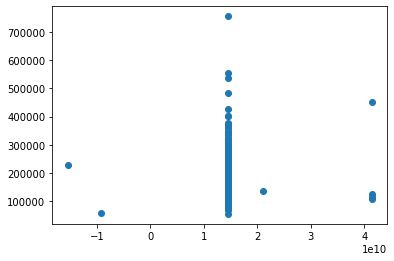

<Figure size 216x216 with 0 Axes>

In [98]:
plt.scatter(y_pred, y_test)
plt.figure(figsize = (3,3))

In [99]:
stacking.score(X_train, y_train)

-30324146258.33265

In [100]:
stacking.score(X_test, y_test)

-32439633948.36457

In [101]:
cross_val_score(stacking, X, y, cv=10)

array([-8.00935897e+04, -7.09066815e+07, -4.33636419e+09, -2.88765493e+08,
       -3.11032361e+06, -2.25659312e+11, -4.01310427e+04, -1.02701389e+06,
       -4.36044054e+08, -7.83969250e+07])

In [102]:
score_dict = {}
for name in estimators:
    model = name[1]
    model.fit(X_train,y_train)
    score_dict[name[0]] = [model.score(X_train, y_train),  model.score(X_test, y_test)]
print(score_dict)  

{'linreg': [0.9315323122442378, -10144627.042905992], 'ridge': [0.8901551415600744, 0.8731019954628951], 'lasso': [0.6924543742337819, 0.7663237726932755], 'knr': [0.7718514832310309, 0.6384582159820953], 'tree': [1.0, 0.7726043762982953]}


Видим, что в модели что-то не то. Уберём модель линейной регресии(опытным путём выяснилось, что она вводит какую-то погрешность). 
### Второй вариант стекинга

In [127]:
estimators2 = [
              ('ridge', RidgeCV()),
              ('lasso', LassoCV()),
              ('knr', KNeighborsRegressor()),
              ('tree', DecisionTreeRegressor()), 
]

In [128]:
stacking2 = StackingRegressor(estimators2)

In [129]:
stacking2.fit(X_train, y_train)

StackingRegressor(estimators=[('ridge',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('lasso', LassoCV()),
                              ('knr', KNeighborsRegressor()),
                              ('tree', DecisionTreeRegressor())])

In [130]:
y_pred2 = stacking2.predict(X_test)

<Figure size 216x216 with 0 Axes>

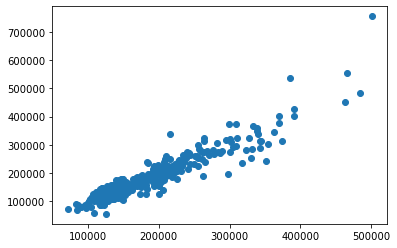

<Figure size 216x216 with 0 Axes>

In [131]:
plt.scatter(y_pred2, y_test)
plt.figure(figsize = (3,3))

In [132]:
stacking2.score(X_train, y_train)

0.9422489884402888

In [133]:
stacking2.score(X_test, y_test)

0.8677991382032693

In [134]:
score_dict2 = {}
cross_dict2 = {}
for name2 in estimators2:
    model2 = name2[1]
    model2.fit(X_train,y_train)
    score_dict2[name2[0]] = [model2.score(X_train, y_train),  model2.score(X_test, y_test)]
print(score_dict2)  

{'ridge': [0.8901551415600744, 0.8731019954628951], 'lasso': [0.6924543742337819, 0.7663237726932755], 'knr': [0.7718514832310309, 0.6384582159820953], 'tree': [1.0, 0.781922818813816]}


Теперь всё хорошо работает в стекинге. Видно, что на тестовых данных самый лучший показатель качества модели у ridge -  0.8731019954628951, а у стекинга при этом - 0.8677991382032693. Что же получается, что стекинг не всегда показывает лучшие результаты, но явно не сильно хуже. Необходимо рассматривать всегда модели в привязки с задачей, получается нельзя сказать, что всегда что-то будет лучше.